# Taller de Física Computacional 2020

### Segundo Parcial - Parte B

### 29 de noviembre de 2020

**IMPORTANTE:**
- **¡No olvide resolver la parte A en Google Forms!**
 Resuelva los ejercicios en un notebook nuevo que debería subir como respuesta a esta tarea una vez resuelto.
- Comente el código de manera que sea legible por otra persona.
- Todas las celdas deben ejecutar sin error. Se recomienda hacer un reinicio del núcleo y evaluar todas las celdas en orden para asegurarse que ejecuta como corresponde antes de entregar.
- Lea **atentamente** las consignas.


**Ejercicio 1** (*20 puntos*) Dada la función

$
f(x,y) = sen^{2}(x) + cos^{2}(y)
$

graficarla utiliando curvas de nivel junto con su gradiente en la región $x \in [-\pi, \pi ] \wedge y \in [-\pi,\pi]$

#### Respuesta:

In [1]:
#importamos
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

#Set unicode latex support
mpl.rcParams['text.usetex'] = True

In [2]:
#DEfinimos la grilla de trabajo desde -pi hasta pi tnato en x como y 
xs = np.linspace(-np.pi,np.pi,100)
ys = np.linspace(-np.pi,np.pi,100)
xg,yg = np.meshgrid(xs,ys)

#Evaluamos la función en la grilla
fg = np.square(np.sin(xg)) + np.square(np.cos(yg))


#Obtenemos el gradiente de la función
Gfx,Gfy =  np.gradient(fg) 

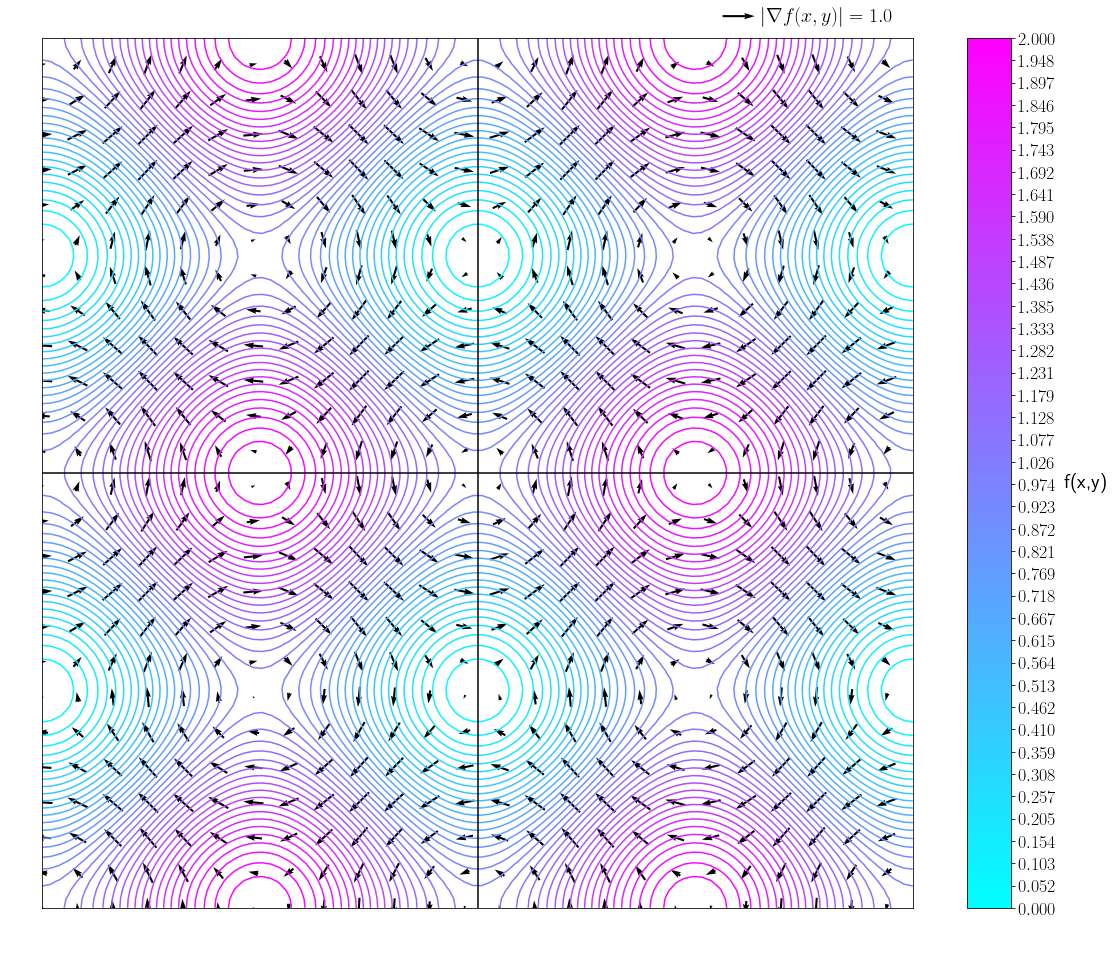

In [3]:
#Ploteamos las líneas de contorno y su gradiente

#Seteamos parametros del figure,titulos, label, ticks, etc.
plt.figure(figsize=(19.5,16))
col = "white" #cambiar a white en caso de usar dark themes
plt.title(r"$f(x,y) = sin^{2}(x) + cos^{2}(y) \wedge \nabla f(x,y)$",fontsize = 24,pad = 12,color = col)
plt.xlabel('x',color = col,fontsize = 30)
plt.ylabel('y',color = col,fontsize = 30,rotation = 'horizontal')
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
set_equal = plt.axis('equal')
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)
plt.tick_params(axis = 'both', which = 'both', color = col, labelcolor = col,labelsize = 14)

#Defino los niveles de contornos, escala de colores.
minf = fg.min()
maxf = fg.max()
n_level = np.linspace(minf,maxf,40)


#ploteo líneas de contorno y barra de colores para mostrar magnítud
contour_plot = plt.contour(xg,yg,fg,levels = n_level,cmap = 'cool')
#contour_plot = plt.contourf(xg,yg,fg,levels = n_level,cmap = 'cool')

#Generamos la barra de colores
norm = mpl.colors.Normalize(vmin=contour_plot.cvalues.min(),vmax=contour_plot.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm,cmap='cool')
sm.set_array([])
f_colorbar = plt.colorbar(sm,ticks = n_level)#,fraction = 0.015, pad = 0.02, aspect = 80)
f_colorbar.set_label(label = "f(x,y)",size = 20,rotation='horizontal',labelpad=30)
f_colorbar.ax.tick_params(labelsize = 18)

#Logré sacarle el espacio blanco que se genera cuando agrego el colorbar,
#Probé variando los parametros fraction, shrink,aspect y pad en plt.colorbar para cambiarlo
#ERa un problema del tamaño de la figura
#de todas maneras creo que hubiera sido mejor apuntar a graficar via OO

#Ploteamos el gradiente
#Para no meter otro colorbar, escalamos el grosor de las líneas al valor del modulo del gradiente
Gf_m = np.sqrt(np.square(Gfx) + np.square(Gfy))
#line_scl = 6 * (Gf_m / Gf_m.max()) 
#gradient_plot = plt.streamplot(xg,yg,Gfx,Gfy,density = 2,linewidth = line_scl,arrowstyle="simple",color = "dimgray")

#Probé primero con el streamplot pero me gusta más y se entiende mejor con quiver(hay menos ruido visual)
#Y se puede agregar el quiver key a modo de escala 

#Seteamos el slice de la grilla numerica con step de 4 para que no tome todos los puntos y se vea mejor
skip = (slice(None,None,4),slice(None,None,4)) 
quiv_plot = plt.quiver(xg[skip],yg[skip],Gfx[skip],Gfy[skip],pivot='middle')
quiv_key = plt.quiverkey(quiv_plot,X=2,Y=3.3, U=0.1,label= r"$\vert \nabla f(x,y) \vert = 1.0$",labelpos='E',coordinates='data',fontproperties={'size':20})


**Ejercicio 2** (*20 puntos*) La ecuación diferencial de primer orden llamada *logística* es un caso particular de una familia de ecuaciones diferenciales llamadas "de Bernoulli". Una expresión simplificada es la siguiente:

$\frac{dy}{dt} = y(t)(1 - y(t))$

Es una ecuación diferencial no lineal que ha sido "descubierta" en diversas ocasiones en el contexto de la dinámica de poblaciones. El primer factor en el lado derecho genera inicialmente un crecimiento exponencial que luego es compensado por el segundo factor, la ralentización del crecimiento de la población por la escasez de recursos, tales como alimento, espacio, etc.. La solución analítica se conoce como *función logística*:

$y(t) = \frac{e^{t}}{e^{t} + C}$

Donde C es una constante real. Compare gráficamente la solución analítica para la condición inicial y(0) = 1/1001 (correspondience a C = 1000) en el dominio $t \in [0, 20]$ con la solución numérica obtenida por al menos dos métodos distintos. Los métodos pueden ser programados por Ud. o estar implementados en un librería de Python (por ejemplo en la rutina `odeint` del paquete `scipy.integrate`).


#### Respuesta:


In [4]:
from scipy.integrate import odeint

##################################
#Comparar soluciones de:         #
#                                #    
#       dy/dt = y(t)*(1-y(t))    #
#                                # 
##################################

#definimos nuestra y'(t) (Para euler, runge kutta y odeint)
def y_prim(y,t=0):
    
    dydt = y * (1 - y)
    return dydt

#Metodo de euler
def euler(y0,h,g,n_iter):
    
    #Metodo de Euler o 1er orden
    y = np.zeros(n_iter)
    y[0] = y0    #Asiganmos la condición inicial
    
    for n in range(0,n_iter-1):
        y[n+1]= y[n] + h * g(y[n])
    
    return y
    
#Metodo runge-kutta cuarto orden
def runge_kutta(y0,h,g,n_iter):
    
    #runge kutta de 4to orden
    y = np.zeros(n_iter)
    y[0] = y0 #Asiganmos la condición inicial
    
    for n in range(0,n_iter-1):
        K_0 = h * g(y[n])
        K_1 = h * g(y[n] + (K_0 / 2))
        K_2 = h * g(y[n] + (K_1 / 2))
        K_3 = h * g(y[n] + K_2)
        y[n + 1] = y[n] + (1/6) * (K_0 + 2*K_1 + 2*K_2 + K_3)
        
    return y


In [5]:
#Parametros comunes a todos los metodos 

t0 = 0                  #Tiempo inicial
tfinal = 20             # "     final
N = 20                  # N de intervalos
ts = np.linspace(t0,tfinal,N) #secuencia de valores de t
dt = (tfinal - t0) / N   #paso de integración
cond_inic = 1/1001

In [6]:
###############################################
#        Resolvemos por euler casero          #
###############################################

# Tenemos que dy/dt = y(t)*(1-y(t)) ^ y[n+1] = y[n] + h * y'[n]
#por lo tanto y[n+1] = y[n] + h * (y[n]*(1-y[n]))

sol_euler = euler(cond_inic,dt,y_prim,N)

In [7]:
###############################################
#   Solución con Runge-Kutta casero 4°orden   #
###############################################

# En analogía con el metodo de euler 
sol_RK = runge_kutta(cond_inic,dt,y_prim,N)

In [8]:
###############################################
#           Solución con odeint               #
###############################################

#PAra resolver con odeint solo hay que armar ecuaciones de grado 1 (ya la tenemos así)
#y entregarle como función el valor de dy/dt junto con la condición inicial y la serie de valores donde se evalua la funci+oon

sol_odeint = odeint(y_prim,cond_inic,ts)

In [9]:
###############################################
#      Obtenemos la solución analítica        #
###############################################

# Para y(0) = 1/1001 --> C=1000
sol_analitic = np.exp(ts) / (np.exp(ts) + 1000)


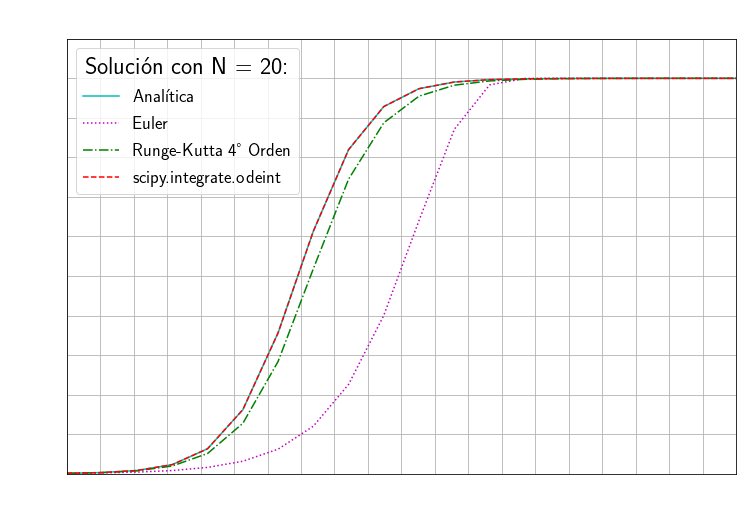

In [10]:
###############################################################################################
#Plotemos las diferentes soluciones para comparar
#Seteamos parametros del figure,titulos, label, ticks, etc.
maxy = sol_analitic.max() * 1.1 #aumento el lim superior a un 10% del maximo
miny = 0
col2 = "white" #cambiar a white en caso de usar tema oscuro

fig = plt.figure(figsize=(12,8))
plt.title(r"$y'(t) = y(t)*(1-y(t))$",fontsize = 24,pad = 14,color = col)
plt.xlabel('t',color = col2,fontsize = 20)
plt.ylabel('y(t)',color = col2,fontsize = 20,labelpad = 20,rotation = 'horizontal')
plt.xticks(np.linspace(t0,tfinal,21))
plt.yticks(np.linspace(miny,maxy,12))
plt.xlim(t0,tfinal)
plt.ylim(miny,maxy)
plt.grid(True)
plt.tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)

plt.plot(ts,sol_analitic,"-c",label = "Analítica")
plt.plot(ts,sol_euler,":m",label = "Euler")
plt.plot(ts,sol_RK,"-.g",label = "Runge-Kutta 4° Orden")
plt.plot(ts,sol_odeint,"--r",label = "scipy.integrate.odeint")
legend = plt.legend(title = f"Solución con N = {N}:",title_fontsize = 24,fontsize = 18 )
